# Bayesian data Analysis in python 🎲
in simple terms, bayesian inference means updating someone belief about someting as the new information becomes available

now what is the difference between the frequentist and bayesian?

frequentist : probability -> proportion of outcomes parameters -> fixed value

bayesian probability -> degree of believe parameters -> random variable

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Probability 🎯

**probability rules**

1. sum rules -> probability of A or B (independent events)
or = addition
for example the probability of rolling 2 or 4 with a die:
p(2 or 4) = 1/6 + 1/6 = 0.333 = 33.3%

2. product rule
probability of A and B (independent rules)
and = muliplication
for ex rolling 2 and then 4 with a die:
p(2 and 4) = 1/6 * 1/6 = 0.0277 = 2.8%

**Conditional Probability**
p (A|B) : the probability of A given B

imagined in a box there a 2 orange balls and 1 blue ball
p(orange) = 2/3 -> unconditional
p(blue) = 1/3 -> unconditional

p(blue|orange) = 1/2 -> conditional (the probability drawing blue when orange already picked)

p(orange|blue) = 1 -> the probability of drawing orange when blue already picked

**Bayes's Theorem**
p(A|B) = P(B|A) * P(A) / P(B)

In [ ]:
import pandas as pd

data = [[False, True], [True, True], [False, False], [False,False],[False,False]
        , [False,False], [True,False],[False,False],[False,False],[True, True]
        ,[False,False],[False,False],[False,False],[True,False],[False,False]
        ,[False,False],[False,True],[False,True],[True,True]]

road_conditions = pd.DataFrame(data, columns=['accident', 'slippery'])

In [ ]:
road_conditions.head()
#now fo example we have the data of accident when its slippery or not

,accident,slippery
0,False,True
1,True,True
2,False,False
3,False,False
4,False,False


In [ ]:
#unconditional probability of an accident
p_accident = road_conditions['accident'].mean()
print(p_accident)

0.2631578947368421


In [ ]:
#unconditional probabilty of the road being slippery
p_slippery = road_conditions['slippery'].mean()
print(p_slippery)

0.3157894736842105


In [ ]:
#probability of the road being slippery given there is an accident
p_slippery_given_accident = road_conditions.loc[road_conditions["accident"]]["slippery"].mean()
print(p_slippery_given_accident)

0.6


In [ ]:
#probability of an accident given the road is slippery
p_accident_given_slippery = p_slippery_given_accident * p_accident/p_slippery
print(p_accident_given_slippery)

0.5


# Getting Deep into Bayesian 🧩
back to the bayesian formula:
p(parameters|data) = p(data|parameters) * p(parameters) / p(data)

**lets break it down:**
1. p(parameters|data) -> **posterior distribution** = or it is what we know about parameters after having seen the data (basically we update out belief after seeing more data)
2. p(parameters) -> **prior distribution** = it is what we know about the parameters before seeing any data (prior belief)
3. p(data|parameters) -> **likelihood** of the data according the statistcal model
4.p(data) -> scaling factors



## Grid Approximation

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#lets make an example by tossing a coin!
#so the questions is..
#whats the probability of tossing heads with a coin,
# if we observed 75 heads in 100 tosses?

num_heads = np.arange(0,101,1)

In [ ]:
num_heads #simulate the number of heads we observed in 100 toses

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
head_prob = np.arange(0, 1.01, 0.01)

In [ ]:
head_prob #now because we cannot list all posibilities from 0 to 1
#we will simplify it, by making a grid by 1 percentage point

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
#combine the data
coin = ([(x,y) for x in num_heads for y in head_prob])
coin.columns = ["num_heads","head_prob"]

In [ ]:
coin.head(15) #basically we list of all posibble outcome,
#the possible probability for each number of heads observed

,num_heads,head_prob
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04
5,0,0.05
6,0,0.06
7,0,0.07
8,0,0.08
9,0,0.09


In [ ]:
#now we already set a prior, now lets think what we know about the probaility of tossing heads
#before seeing any data? beacuse we know nothing we will use the uniform distribution!

coin["prior"] = uniform.pdf(coin["head_prob"])

In [ ]:
coin.head(15)
#since under the uniform distribution all head-prob values are equally likely,
#we'll ones always

,num_heads,head_prob,prior
0,0,0.00,1.0
1,0,0.01,1.0
2,0,0.02,1.0
3,0,0.03,1.0
4,0,0.04,1.0
5,0,0.05,1.0
6,0,0.06,1.0
7,0,0.07,1.0
8,0,0.08,1.0
9,0,0.09,1.0


In [ ]:
#alright move on to the likelihood
#we will model coin flips using binomial distribution,

coin["likelihood"] = binom.pmf(coin["num_heads"],100, coin["head_prob"])
#binom function parameters -> the number of head, the total number of tosses
# the probability of heads

In [ ]:
coin.head(5)

,num_heads,head_prob,prior,likelihood
0,0,0.00,1.0,1.000000
1,0,0.01,1.0,0.366032
2,0,0.02,1.0,0.132620
3,0,0.03,1.0,0.047553
4,0,0.04,1.0,0.016870


Lets look at the first row:
the likelihood is 1 because if the heads probability is 0, then observing 0 heads in 100 tosess is 100% likely.

in the second row: the likelihood of observing 0 heads in 100 tosses is almost 37%.

In [ ]:
#next lets calculate the bayes formula
#we multiplu the prior with the likelihood, and scale by the  producst sum to
#get the posterior probabilities

coin["posterior_prob"] = coin["prior"] * coin["likelihood"]

In [ ]:
coin.head()

,num_heads,head_prob,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,1.000000
1,0,0.01,1.0,0.366032,0.366032
2,0,0.02,1.0,0.132620,0.132620
3,0,0.03,1.0,0.047553,0.047553
4,0,0.04,1.0,0.016870,0.016870


In [ ]:
print(coin["posterior_prob"].sum())

100.99999999999997


In [ ]:
coin["posterior_prob"] /= coin["posterior_prob"].sum()

In [ ]:
coin.head()

,num_heads,head_prob,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.366032,0.003624
2,0,0.02,1.0,0.132620,0.001313
3,0,0.03,1.0,0.047553,0.000471
4,0,0.04,1.0,0.016870,0.000167


In [ ]:
#lets plot it!
#back to the previous questions, we observed 75 heads
heads75 = coin.loc[coin["num_heads"] == 75]
heads75["posterior_prob2"] = heads75["posterior_prob"]/ heads75["posterior_prob"].sum()

<ipython-input-43-1531d3db9873>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heads75["posterior_prob2"] = heads75["posterior_prob"]/ heads75["posterior_prob"].sum()


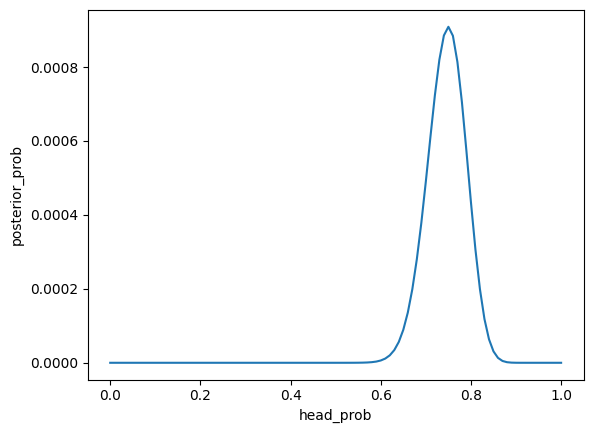

In [ ]:
sns.lineplot(data=heads75, x="head_prob", y="posterior_prob")
plt.show()
#now our estimates it is likely around 75%, with the values betweenmore less 60% and 85% being possible

# Lets do more case and example! 🪩

imagined working in the goverment' departement of health. and you have a task to estimating the drug's efficacy rate OR the percentage of patients cured by the drug.

now, we have an experiment was set -> 10 sick patients have been treated with the drug. now lets get workng!

In [ ]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11,1)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0, 1.01, 0.01)

# Combine the dataframe
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])
df.columns = ["num_patients_cured", "efficacy_rate"]

df.head()

,num_patients_cured,efficacy_rate
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04


In [ ]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

In [ ]:
df.tail()

,num_patients_cured,efficacy_rate,prior,likelihood
1106,10,0.96,1.0,0.664833
1107,10,0.97,1.0,0.737424
1108,10,0.98,1.0,0.817073
1109,10,0.99,1.0,0.904382
1110,10,1.00,1.0,1.000000


<ipython-input-16-fc4f5af21dc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


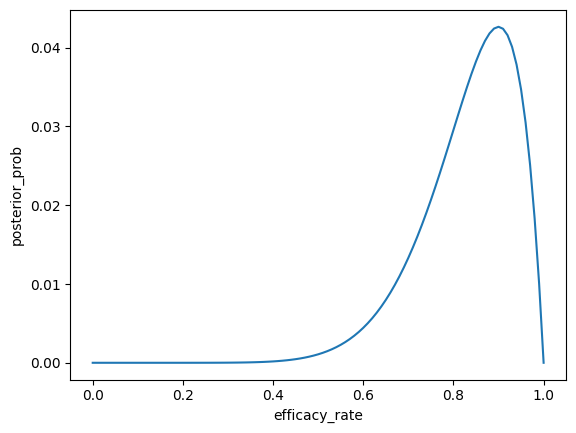

In [ ]:
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
sns.lineplot(data=df_9_of_10_cured, x="efficacy_rate", y="posterior_prob")
plt.show()

As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!

⚙️ Now Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, there are new experiments! a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian. We simply need to run the grid approximation similarly as before, but with a different prior (because we now have new beliefe based on previous experiments)

We can use all our knowledge about the efficacy rate (from the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

In [ ]:
df.head()

,num_patients_cured,efficacy_rate,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.904382,0.008954
2,0,0.02,1.0,0.817073,0.008090
3,0,0.03,1.0,0.737424,0.007301
4,0,0.04,1.0,0.664833,0.006583


In [ ]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
#new likelihood with new experiments data there 12 patients now
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

In [ ]:
# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"]*df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

In [ ]:
# Compute the posterior probability of observing 10 cured patients out of 12 patients
df_10_of_12_cured = df.loc[df["num_patients_cured"]==10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

<ipython-input-20-676a584dbfc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


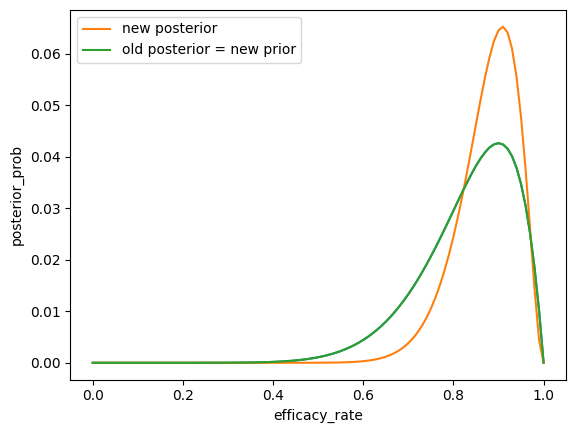

In [ ]:
sns.lineplot(data=df_9_of_10_cured, x="efficacy_rate", y="posterior_prob")

sns.lineplot(data=df_10_of_12_cured, x="efficacy_rate",y="new_posterior_prob",
             label="new posterior")

sns.lineplot(data=df_9_of_10_cured, x="efficacy_rate", y="posterior_prob",
             label="old posterior = new prior")
plt.show()

see the new posterior is higher and narrower than the old one, which means there is less uncertainty in the estimation. Adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus 🎊

# Prior Belief 📥
what is Prior distribution? well prior distribution reflects what we know about the parameter before observing any data:
1. when we know nothing -> uniform distribution (all values equally likely)
2. old posterior -> can be updated with new data

we can choose any probability distribution as a prior to include external info in the model:
- expert opinion
- common knowledge
- previos research
- subjective belief

Prior Distribution
1. prior distribution chosen before we see the data
2. prior choice can impact posterior results (espescially with little data)
3. to avoid cherry-picking, prior choice should be:
- clearly stated
- explainable: based on previous research, sensible assumption, exper opinion etcc

conjugate priors:
some priors, multiplied with specific likelihood, yield known posterior. we see some example later..

now there are two ways to get the posterior:

1. Simulation
if posterior is known, we can sample it using any known distribution

2. Calculation
if posterior is not known, we can calculate it using grid approximation

in practice, however simulation is easier and faster

Continue the drugs efficacy example, imagined a couple of neighboring countries managed to conduct more extensive experiments and have just published their results. You can use them as priors in your analysis!

Having browsed all the publications, you conclude that the reported efficacy rates are mostly between 70% and 90%. A couple of results below 50% were recorded too, but not many. now we can use some distribution for prior information! for eaxample beta(5,2)

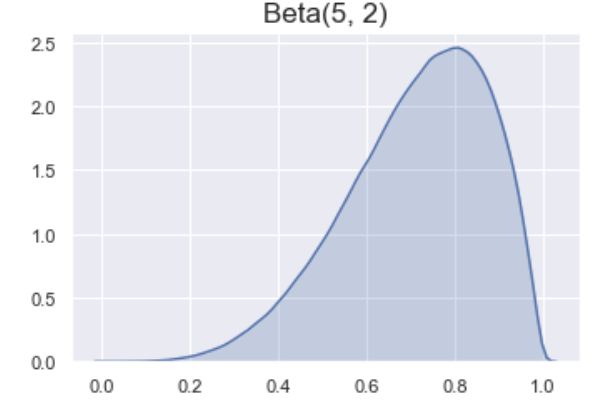

now we have decided to use beta(5,2) prior for the eficacy rate. and then using binomial distribution to model the data (curing a sick patient is a "success")
so in this scenario the beta ditribution is a conjugate prior.

the beta distribution Beta(a,b) then posterior is Beta(x,y) with:
x = number of success + a
y = number of observations - number of success + b

lets simulate!

<ipython-input-3-527eec5ae966>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(posterior_draws, shade=True)


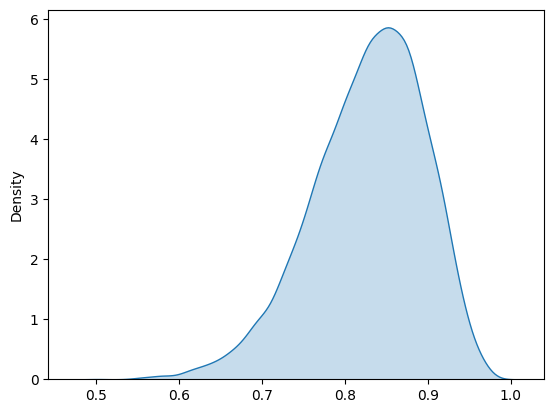

In [ ]:
# Define the number of patients treated and cured
num_patients_treated = 10 + 12 #10 is first experiments, 12 2nd experiments
num_patients_cured = 9 + 10 # the total cured patients in first and second experiments

# Simulate 10000 draws from the posterior distribuition
# the distribution is beta(5,2) -> beta(x,y)
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, shade=True)
plt.show()

Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in our data you observe 86% (19 out of 22). This is the impact of the prior -> we learn not only from your our small experience data, but also from other countries' experience!

# Reporting Bayesian Results 🔖
well the honest way to report bayesian results is to show the prior and posterior distribution. but sometimes it is not practical.

no single number can fully convey the complete information contained in a distribution. HOWEVER, sometimes a point estimate of a parameter is needed.  we can use the mean or the median  of the posterior distribution.

## Credible Interval
1. it is an interval that the probability that the parameter falls inside it is x%
2. the wider the credibel interval, the more uncertainty in parameter estimate
3. parameter is random. so it can fall into an interval with some probability
4. NOTE in the requentist world, the (confidence) interval is random while the parameter is fixed

## Highest Posterior Density (HPD)
to calculate this we an use arviz library that is used for bayesian inference.
we pass the posterior draw, setting the highest density interval probability to 0-9 that is 90% -> then we get the lower and upper bound that we can interpret as --> the probability that the parameter lies between for ex -4 to 4 is 90%

In [ ]:
posterior_draws

array([0.75592734, 0.87907377, 0.84803625, ..., 0.87753685, 0.82424825,
       0.79217855])

well we have our simulated posterior draw, now we need to draw some conclusion for our report.


In [ ]:
# lets calculate expected number of people cured
cured_expected = np.mean(posterior_draws) * 100000 #we use mean here to use the point estimate
print(cured_expected)

82684.45248314083


In [ ]:
# the minimum of people cured with 50% probability
min_cured_50_perc = np.median(posterior_draws)*100000
print(min_cured_50_perc)

83367.20782644424


In [ ]:
#the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(posterior_draws,10) *100000
print(min_cured_90_perc)

73568.77658559753


In [ ]:
#reports summary
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82684 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83367, and with 90% probability 
it will not be less than 73568.


## Highest Posterior Density credible interval 🏹
reporting bare point estimates is not enough. it will be great to provide a measure of uncertainty in the drug's efficacy rate estimate.

In [ ]:
import arviz as az

In [ ]:
ci_90 = az.hdi(posterior_draws, hdi_prob=0.90)
ci_95 = az.hdi(posterior_draws, hdi_prob=0.95)

In [ ]:
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.93, 
and with a 95% probability it is between 0.69 and 0.95.
